<font color='purpel' size=5><b>Комментарий тимлида</b></font>

<font color='purpel'>Фёдор, привет! . Перед нами интересная задача, давай смотреть, что получилось в первой части)
    
<font color='purpel'>Я буду использовать различные цвета и знаки, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='steelblue'>синий текст - комментарий студента</font>

<font color='green'> ✔️зеленый текст - все отлично</font>

<font color='darkorange'>⚠️оранжевый текст - есть рекомендации, на что стоит обратить внимание</font>

<font color='crimson'> ❌красный текст - есть недочеты</font>

<font color='purpel' size=3><b>Комментарий тимлида p.2</b></font>

<font color='green' size=3> ✔️ Фёдор, привет.Комментарии по ворой части отмечены p.2</font>



# Подготовка данных

## Установка пакетов

In [1]:
import sys

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install lightgbm

## Импорт библиотек

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
import time
import session_info
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

from catboost import CatBoostRegressor

import lightgbm as lgb

import joblib

In [3]:
#session_info.show()

## Загрузка данных

In [4]:
PATH_LIST = ['data_arc_new.csv', 'data_bulk_new.csv', 'data_bulk_time_new.csv', 'data_gas_new.csv', 'data_temp_new.csv', \
             'data_wire_new.csv', 'data_wire_time_new.csv']

In [5]:
data = {}
for path in PATH_LIST:
    name = re.sub(r'.csv', '', path)
    try:
        df = pd.read_csv(path)
    except:
        path = '/datasets/' + path
        df = pd.read_csv(path)
    data[name] = df

<font color='purpel' size=3><b>Комментарий тимлида p.2</b></font>

<font color='crimson'> ❌ Коддолжен воспроизводиться на платформе яндекс.</font>



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента p2:</b>

Исправлено
</div>

## Первичный анализ данных

**В этом разделе будет выполнено:**
- анализ типов данных и размера датасетов
- посчитано количество уникальных плавок стали (образцов) (значений в поле 'key')
- посчитано количество пропусков и явных дубликатов
- посчитано количество аномалий, при этом, аномалиями считаются:
    - числовые данные меньше 0
    - временные метки, большие текущей даты
- проанализировано распределение числовых данных

DATA_ARC_NEW
Уникальных номеров плавки --- 3214
   key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   

   Реактивная мощность  
0             0.211253  
1             0.477438  
2             0.430460  
3             0.379979  
4             0.643691   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Актив

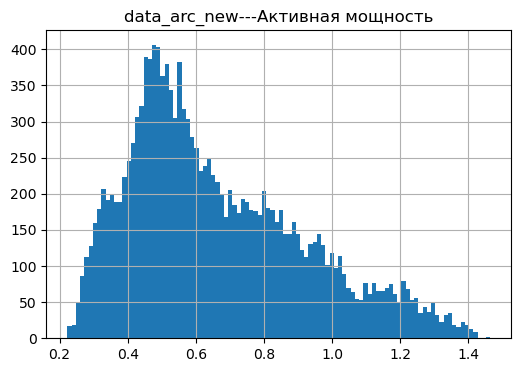

Реактивная мощность 

count    14876.000000
mean         0.438986
std          5.873485
min       -715.479924
25%          0.337175
50%          0.441639
75%          0.608201
max          1.270284
Name: Реактивная мощность, dtype: float64 



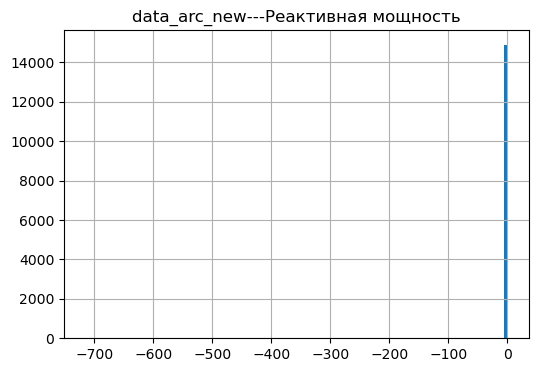

ANOMALY NUMBER --- data_arc_new --- Реактивная мощность
Числовых аномалий 1
Временных аномалий 0
__________________________
__________________________ 

DATA_BULK_NEW
Уникальных номеров плавки --- 3129
   key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN     

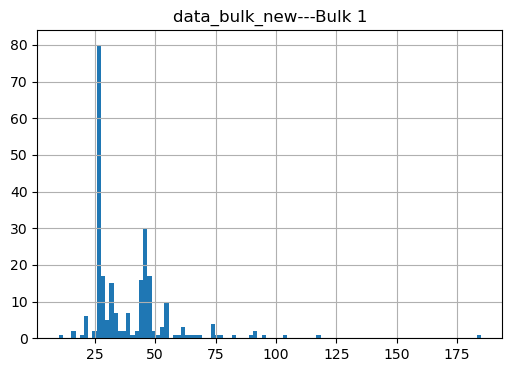

Bulk 2 

count     22.000000
mean     253.045455
std       21.180578
min      228.000000
25%      242.000000
50%      251.500000
75%      257.750000
max      325.000000
Name: Bulk 2, dtype: float64 



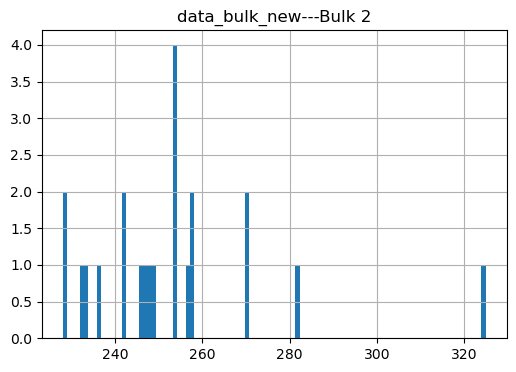

Bulk 3 

count    1298.000000
mean      113.879045
std        75.483494
min         6.000000
25%        58.000000
50%        97.500000
75%       152.000000
max       454.000000
Name: Bulk 3, dtype: float64 



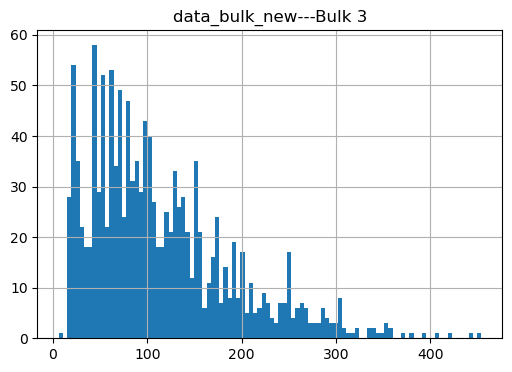

Bulk 4 

count    1014.000000
mean      104.394477
std        48.184126
min        12.000000
25%        72.000000
50%       102.000000
75%       133.000000
max       281.000000
Name: Bulk 4, dtype: float64 



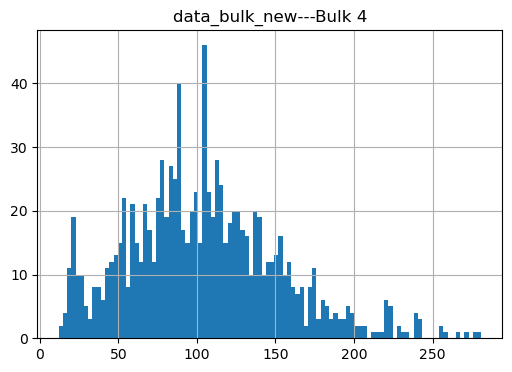

Bulk 5 

count     77.000000
mean     107.025974
std       81.790646
min       11.000000
25%       70.000000
50%       86.000000
75%      132.000000
max      603.000000
Name: Bulk 5, dtype: float64 



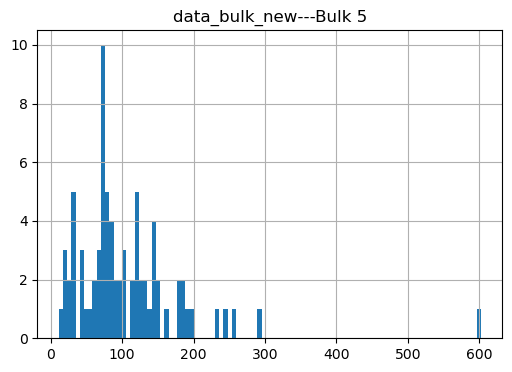

Bulk 6 

count    576.000000
mean     118.925347
std       72.057776
min       17.000000
25%       69.750000
50%      100.000000
75%      157.000000
max      503.000000
Name: Bulk 6, dtype: float64 



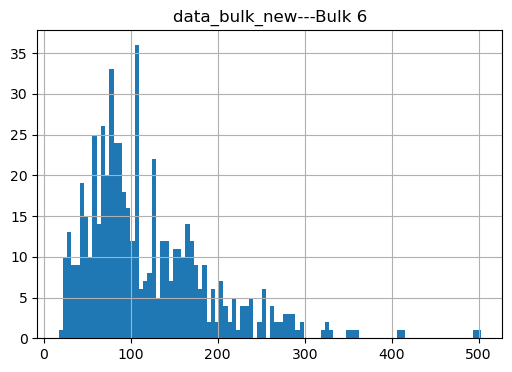

Bulk 7 

count     25.000000
mean     305.600000
std      191.022904
min       47.000000
25%      155.000000
50%      298.000000
75%      406.000000
max      772.000000
Name: Bulk 7, dtype: float64 



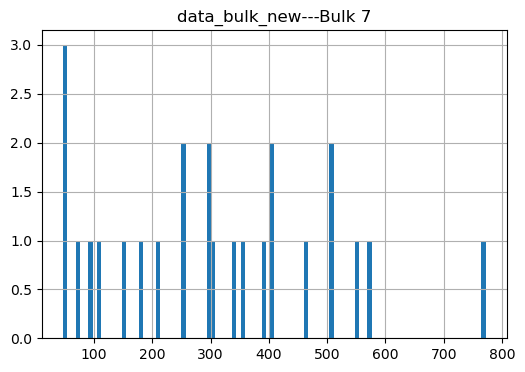

Bulk 8 

count     1.0
mean     49.0
std       NaN
min      49.0
25%      49.0
50%      49.0
75%      49.0
max      49.0
Name: Bulk 8, dtype: float64 



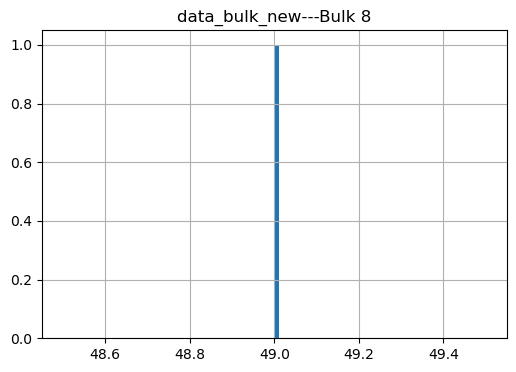

Bulk 9 

count     19.000000
mean      76.315789
std       21.720581
min       63.000000
25%       66.000000
50%       68.000000
75%       70.500000
max      147.000000
Name: Bulk 9, dtype: float64 



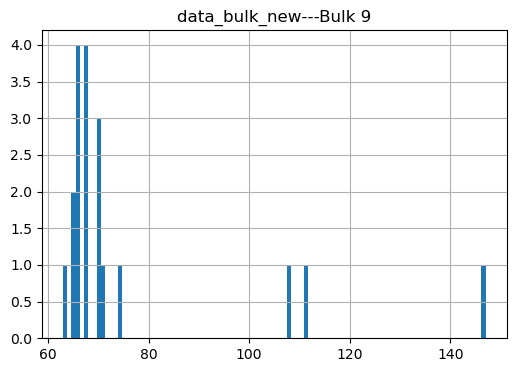

Bulk 10 

count    176.000000
mean      83.284091
std       26.060347
min       24.000000
25%       64.000000
50%       86.500000
75%      102.000000
max      159.000000
Name: Bulk 10, dtype: float64 



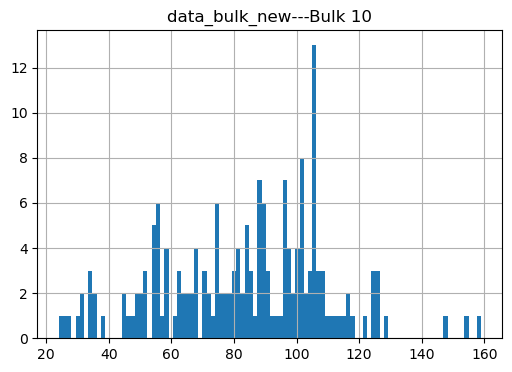

Bulk 11 

count    177.000000
mean      76.819209
std       59.655365
min        8.000000
25%       25.000000
50%       64.000000
75%      106.000000
max      313.000000
Name: Bulk 11, dtype: float64 



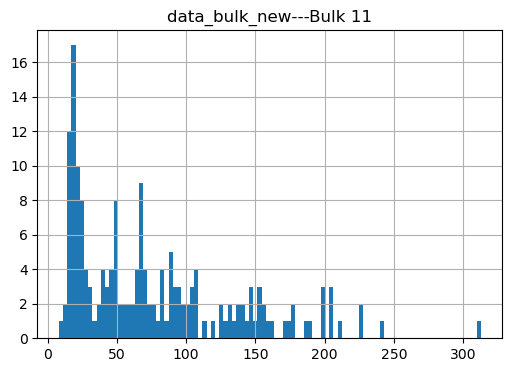

Bulk 12 

count    2450.000000
mean      260.471020
std       120.649269
min        53.000000
25%       204.000000
50%       208.000000
75%       316.000000
max      1849.000000
Name: Bulk 12, dtype: float64 



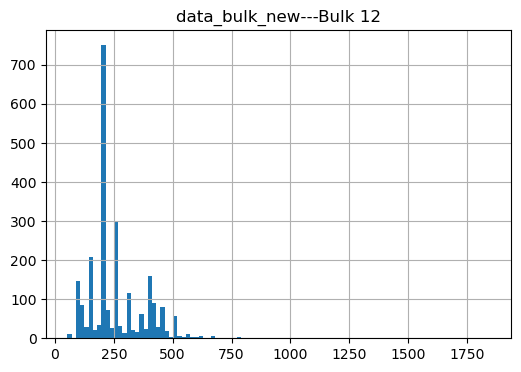

Bulk 13 

count     18.000000
mean     181.111111
std       46.088009
min      151.000000
25%      153.250000
50%      155.500000
75%      203.500000
max      305.000000
Name: Bulk 13, dtype: float64 



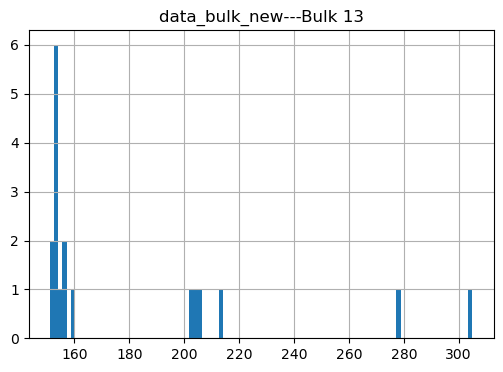

Bulk 14 

count    2806.000000
mean      170.284747
std        65.868652
min        16.000000
25%       119.000000
50%       151.000000
75%       205.750000
max       636.000000
Name: Bulk 14, dtype: float64 



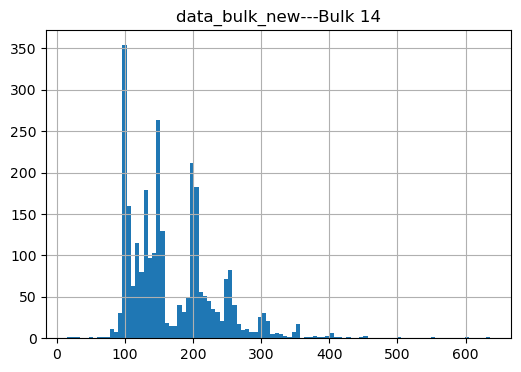

Bulk 15 

count    2248.000000
mean      160.513345
std        51.765319
min         1.000000
25%       105.000000
50%       160.000000
75%       205.000000
max       405.000000
Name: Bulk 15, dtype: float64 



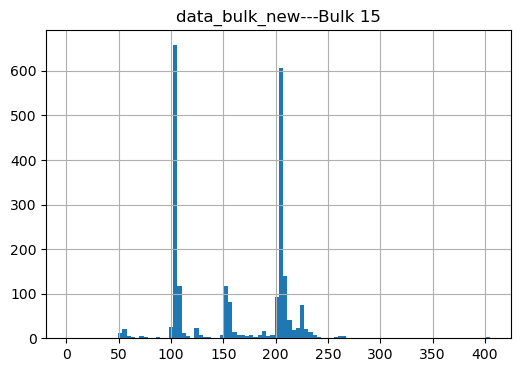

Числовых аномалий 0
Временных аномалий 0
__________________________
__________________________ 

DATA_BULK_TIME_NEW
Уникальных номеров плавки --- 3129
   key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:28:48    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:36:50    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:32:39    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:43:22    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:30:47    NaN    NaN    NaN    NaN   

  Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13              Bulk 14  \
0    NaN     NaN     NaN  2019-05-03 11:24:31     NaN  2019-05-03 11:14:50   
1    NaN     NaN     NaN  2019-05-03 11:53:30     NaN  2019-05-03 11:48:37   
2    NaN     NaN     NaN  2019-05-03 12:27:13     NaN  2019-05-03 12:21:01   
3    NaN     NaN     NaN  2019-05-03 12:58:00     NaN  2

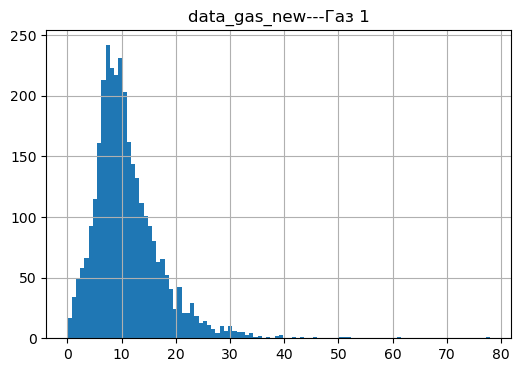

Числовых аномалий 0
Временных аномалий 0
__________________________
__________________________ 

DATA_TEMP_NEW
Уникальных номеров плавки --- 3216
   key         Время замера  Температура
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None 

Missed Values 

key                0
Время замера       0
Температура     3427
dtype: int64 

Duplicated --- 0 

Температура 

count    14665.000000
mean      1590.722741
std         20.394381
min       1191.0000

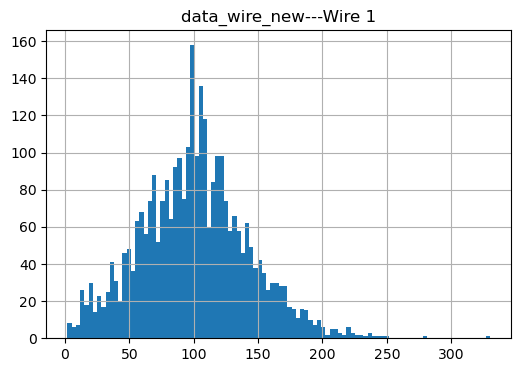

Wire 2 

count    1079.000000
mean       50.577323
std        39.320216
min         0.030160
25%        20.193680
50%        40.142956
75%        70.227558
max       282.780152
Name: Wire 2, dtype: float64 



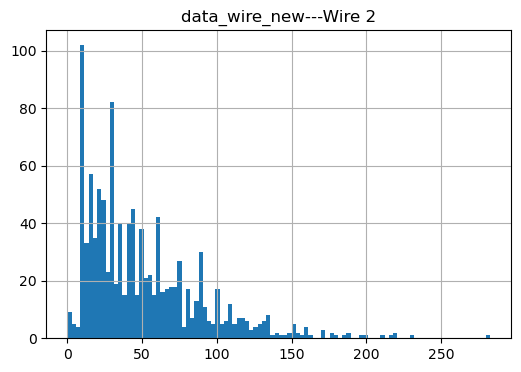

Wire 3 

count     63.000000
mean     189.482681
std       99.513444
min        0.144144
25%       95.135044
50%      235.194977
75%      276.252014
max      385.008668
Name: Wire 3, dtype: float64 



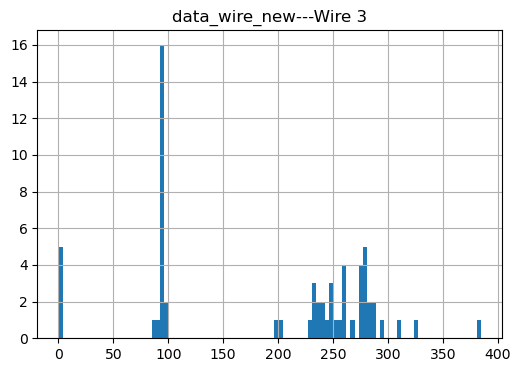

Wire 4 

count     14.000000
mean      57.442841
std       28.824667
min       24.148801
25%       40.807002
50%       45.234282
75%       76.124619
max      113.231044
Name: Wire 4, dtype: float64 



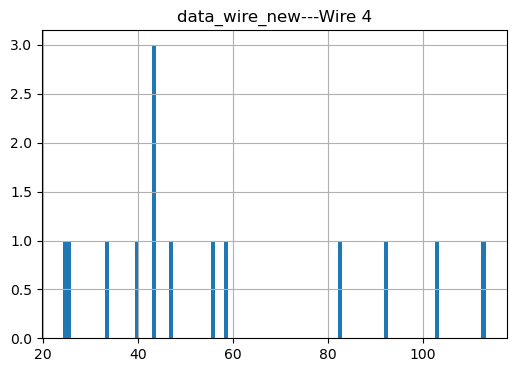

Wire 5 

count     1.000
mean     15.132
std         NaN
min      15.132
25%      15.132
50%      15.132
75%      15.132
max      15.132
Name: Wire 5, dtype: float64 



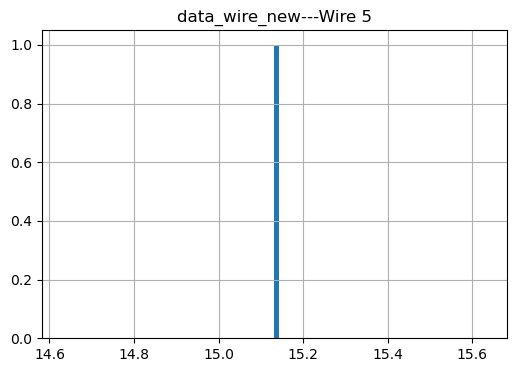

Wire 6 

count     73.000000
mean      48.016974
std       33.919845
min        0.034320
25%       25.053600
50%       42.076324
75%       64.212723
max      180.454575
Name: Wire 6, dtype: float64 



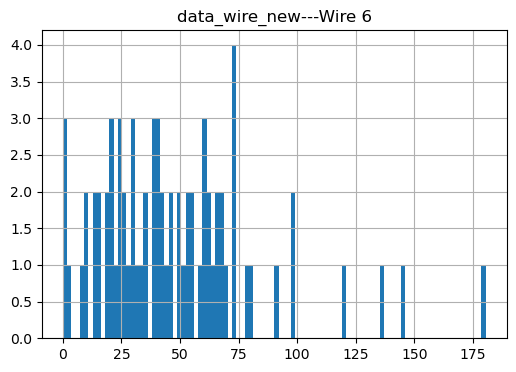

Wire 7 

count    11.000000
mean     10.039007
std       8.610584
min       0.234208
25%       6.762756
50%       9.017009
75%      11.886057
max      32.847674
Name: Wire 7, dtype: float64 



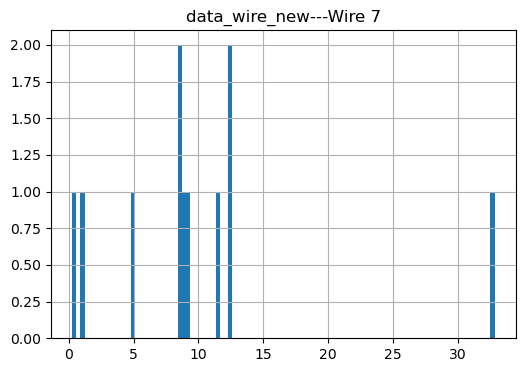

Wire 8 

count     19.000000
mean      53.625193
std       16.881728
min       45.076721
25%       46.094879
50%       46.279999
75%       48.089603
max      102.762401
Name: Wire 8, dtype: float64 



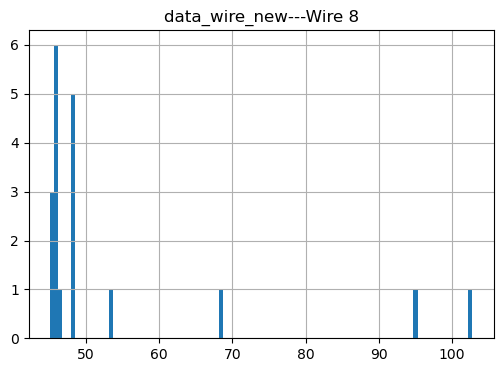

Wire 9 

count    29.000000
mean     34.155752
std      19.931616
min       4.622800
25%      22.058401
50%      30.066399
75%      43.862003
max      90.053604
Name: Wire 9, dtype: float64 



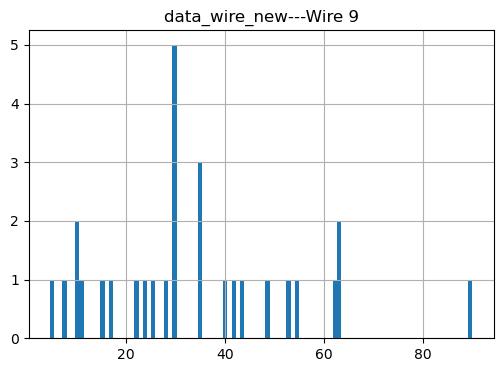

Числовых аномалий 0
Временных аномалий 0
__________________________
__________________________ 

DATA_WIRE_TIME_NEW
Уникальных номеров плавки --- 3081
   key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN    NaN   
4    5  2019-05-03 13:20:44  2019-05-03 13:15:34    NaN    NaN    NaN    NaN   

  Wire 7 Wire 8 Wire 9  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN    NaN  
4    NaN    NaN    NaN   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 

In [6]:
data_rows_before = []
for name in data.keys():
    time_anom = 0
    number_anom = 0
    data_rows_before.append(data[name].shape[0])
    print(name.upper())
    print(f'Уникальных номеров плавки --- {data[name]["key"].nunique()}')
    print(data[name].head(), '\n')
    print(data[name].info(), '\n')
    print('Missed Values \n')
    print(data[name].isna().sum(), '\n')
    print(f'Duplicated --- {data[name].duplicated().sum()} \n')
    for column in data[name].columns:
        if column != 'key' and data[name][column].dtype == 'float64':
            print(column, '\n')
            print(data[name][column].describe(), '\n')
            if column != 'Температура':
                data[name][column].hist(bins=100, figsize=(6,4))
                plt.title(name + '---' + column)
                plt.show()
            for value_n in data[name][column].values:
                if value_n < 0:
                    print(f'ANOMALY NUMBER --- {name} --- {column}')
                    number_anom += 1
        elif column != 'key' and data[name][column].dtype == 'object':
            for value_t in data[name][column].values:
                try:
                    if dt.datetime.strptime(value_t, '%Y-%m-%d %H:%M:%S') > dt.datetime.today():
                        print(f'ANOMALY TIME LABEL --- {name} --- {column}')
                        time_anom += 1
                except:
                    pass
    print(f'Числовых аномалий {number_anom}')
    print(f'Временных аномалий {time_anom}')
    print('__________________________')
    print('__________________________ \n')

<font color='purpel' size=3><b>Комментарий тимлида </b></font>\
<font color='green' size=3> ✔️Отличная автоматизация процесса, не хватает вывода(описания).</font>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента p1:</b>

Дополнил
</div>

**Промежуточный вывод**
В данных представлена информация двух типов:
- по времени (включение нагрева, измерение температуры)
- агрегированная (подача газа и легирующих добавок)

При этом данные рассредоточены по нескольким таблицам, следовательно потребуется их объединять. Ключом для объединения считается идентификатор образца (номер плавки). 

**При объединении в финальную таблицу войдут только те образцы, для которых есть записи во всех таблицах**

## Графики температуры для некорых образцов

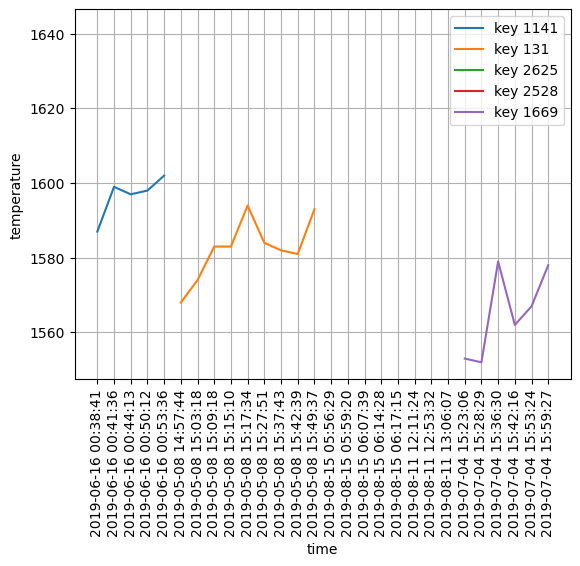

In [7]:
example = np.random.randint(1, data['data_temp_new']['key'].nunique(), 5)
legend = 'key--' + str(example)
for number in example:
    df = data['data_temp_new'].loc[data['data_temp_new']['key'] == number]
    plt.plot(df['Время замера'], df['Температура'], label='key '+str(number))
    plt.xticks(rotation=90)
plt.grid()
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
plt.show()

## Выводы по предварительному осмотру данных
- пропуски в данных обусловлены тем, что какие-то присадочные элементы просто не добавляются. Такие ячейки надо заполнить "0"
- явных дубликатов нет
- неадекватные значения есть только в столбце "реактивная мощность", такие значения надо отбросить
- измерения температуры есть не для всех образцов, в дальнейшем надо будет отобрать только те образцы, для которых такие данные есть, **и измерений более одного**
- **образцы с температурой менее 1500°C не учитываются: такая температура считается аномально низкой**
- для разных легирующих добавок разная технология применения: у каких-то сильно варьируется количество, у других - напротив, может быть всего одна концентрация, в которой эта добавка и используется

## Цель проекта

В качестве цели можно выделить следующие задачи:
- на основании параметров технологического процесса (нагрева и объема газа) и добавляемых присадок предсказать финальную температуру стали

# Предобработка данных и выбор модели ML

## Удаление аномалий и образцов, для которых недостаточно данных по температуре

### Температура

In [8]:
# Аномальные значения
temp_problem_keys = []
for row in data['data_temp_new'].index:
    if data['data_temp_new'].loc[row, 'Температура'] <= 1500:
        temp_problem_keys.append(data['data_temp_new'].loc[row, 'key'])
temp_problem_keys

[867, 1214, 1619, 2052, 2561]

In [9]:
# Записей <= 1 с учетом пропусков
#data['data_temp_new'] = data['data_temp_new'].dropna()
#temp_short_keys = []
#for key in data['data_temp_new']['key'].unique():
#    if data['data_temp_new'].loc[data['data_temp_new']['key']==key].shape[0] <= 1:
#        temp_short_keys.append(key)
#len(temp_short_keys)

In [10]:
data['data_temp_new'] = data['data_temp_new'].dropna()
temp = data['data_temp_new'].groupby('key').agg({'Время замера': ['count']})
temp.columns = temp.columns.map('_'.join)
temp_short_keys = temp.loc[temp['Время замера_count'] == 1].index

<font color='purpel' size=3><b>Комментарий тимлида p.2</b></font>

<font color='green' size=3> ✔️ Можно избежать циклов, наблюдения с одним замером можно найти с помощью групповой таблицы, ключи с аномалиями можно убрать сохранив их в список и исключить, применив функцию isin</font>



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента p2:</b>

Исправлено.

    про isin поясни. пожалуйста, как именно лучше сделать
</div>

### Мощность (отрицательные значения)

In [11]:
power_problem_keys = []
for row in data['data_arc_new'].index:
    if data['data_arc_new'].loc[row, 'Реактивная мощность'] < 0:
        power_problem_keys.append(data['data_arc_new'].loc[row, 'key'])
        
power_problem_keys

[2116]

In [12]:
problem_keys = sorted(list(set(power_problem_keys + list(temp_short_keys) + temp_problem_keys)))
#problem_keys

In [13]:
len(problem_keys)

746

### Удаление данных по аномальным образцам

In [14]:
for name in data.keys():
    for key in problem_keys:
        drop_idx = data[name].loc[data[name]['key']==key].index
        #print(name, '\n', key, '\n', drop_idx)
        data[name] = data[name].drop(labels=drop_idx, axis=0)

In [15]:
for name, i in zip(data.keys(), range(len(data))):
    print(name)
    print(f"Уникальных номеров плавки {len(data[name]['key'].unique())}")
    print(f'Удалено {100 * (data_rows_before[i] - data[name].shape[0]) / data_rows_before[i]:.2f} % записей, \n')

data_arc_new
Уникальных номеров плавки 2470
Удалено 23.18 % записей, 

data_bulk_new
Уникальных номеров плавки 2402
Удалено 23.23 % записей, 

data_bulk_time_new
Уникальных номеров плавки 2402
Удалено 23.23 % записей, 

data_gas_new
Уникальных номеров плавки 2493
Удалено 23.03 % записей, 

data_temp_new
Уникальных номеров плавки 2470
Удалено 23.18 % записей, 

data_wire_new
Уникальных номеров плавки 2367
Удалено 23.17 % записей, 

data_wire_time_new
Уникальных номеров плавки 2367
Удалено 23.17 % записей, 



## Заполнение пропусков

In [16]:
for name in data.keys():
    data[name] = data[name].fillna(0)

## Преобразование признаков-1 и аггрегация данных:

**2 из 7 датасетов имеют несколько записей по одним и тем же образцам для разных временных меток**
Для них данные будут агрегированы и будут сформированы новые признаки.

**Для датасета по нагреву**
- суммарная активная мощность
- суммарная реактивная мощность
- количество включений
- длительность работы нагревателя
- среднеквадратичное отклонение времени работы (как показатель стабильности процесса)

(количество включений и время выделяются отдельно, поскольку в общем случае для одного и того же времени нагрева затраченная энергия может быть разная)

**Для датасета по измерениям температуры**
- последнее значение температуры (таргет)
- начальное значение температуры

### Нагрев

In [17]:
data['data_arc_new'].head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [18]:
data_arc_transformed = data['data_arc_new']
data_arc_transformed['start_sec'] = \
data_arc_transformed['Начало нагрева дугой'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp())
data_arc_transformed['stop_sec'] = \
data_arc_transformed['Конец нагрева дугой'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp())
data_arc_transformed['heat_duration'] = data['data_arc_new']['stop_sec'] - \
data['data_arc_new']['start_sec']
data_arc_transformed.drop(columns=['Конец нагрева дугой', 'Начало нагрева дугой', 'stop_sec'], axis=1)
data_arc_transformed = data_arc_transformed.groupby('key', as_index=False)\
.agg({'Активная мощность':['sum'], 'Реактивная мощность':['sum'], 'heat_duration':['sum', 'count', np.std], 'start_sec':['mean']})
data_arc_transformed.columns = data_arc_transformed.columns.map('_'.join)
data_arc_transformed = data_arc_transformed.rename(columns={
    'Активная мощность_sum':'active_power',
    'Реактивная мощность_sum':'reactive_power',
    'key_':'key',
    'start_sec_mean':'start'
})
data_arc_transformed = data_arc_transformed.fillna(0)

In [19]:
data_arc_transformed.tail()

,key,active_power,reactive_power,heat_duration_sum,heat_duration_count,heat_duration_std,start
2465,2495,3.168133,2.210936,723.0,4,58.345951,1.565426e+09
2466,2496,4.174918,2.872031,940.0,6,52.557270,1.565428e+09
2467,2497,3.605239,2.452092,569.0,3,29.160476,1.565430e+09
2468,2498,3.202310,2.239820,750.0,5,80.286985,1.565432e+09
2469,2499,1.737084,1.296836,883.0,4,110.321878,1.565434e+09


### Температура

In [20]:
data['data_temp_new'].head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [21]:
data['data_temp_new'].shape

(13898, 3)

In [22]:
data_temp_transformed = data['data_temp_new']
data_temp_transformed['time'] = \
data_temp_transformed['Время замера'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp())
data_temp_transformed = data_temp_transformed.sort_values(by='time')
data_temp_transformed = data_temp_transformed.groupby('key', as_index=False).agg({'Температура':['first', 'last']})
data_temp_transformed.columns = data_temp_transformed.columns.map('_'.join)
data_temp_transformed = data_temp_transformed.rename(columns={
    'Температура_first':'first_temperature',
    'Температура_last':'last_temperature',
    'key_':'key'
})

In [23]:
data_temp_transformed.tail()

,key,first_temperature,last_temperature
2465,2495,1570.0,1591.0
2466,2496,1554.0,1591.0
2467,2497,1571.0,1589.0
2468,2498,1591.0,1594.0
2469,2499,1569.0,1603.0


<font color='purpel' size=3><b>Комментарий тимлида p.2</b></font>

<font color='darkorange'>⚠️  Лучше использовать групповую таблицу и функции агрегации firs и last, у нас будет код в две строчки.</font>



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента p2:</b>

Исправлено
</div>

**Итак, для всех датасетов остались только значения по уникальным номерам образцов. Можно объединять**

## Объединение таблиц (inner join using 'key')

In [24]:
df_final = data_temp_transformed.merge(data_arc_transformed, on='key', how='inner')
df_final = df_final.merge(data['data_bulk_new'], on='key', how='inner', suffixes=('_mass', '_time'))
df_final = df_final.merge(data['data_bulk_time_new'], on='key', how='inner', suffixes=('_mass', '_time'))
df_final = df_final.merge(data['data_wire_new'], on='key', how='inner', suffixes=('_mass', '_time'))
df_final = df_final.merge(data['data_wire_time_new'], on='key', how='inner', suffixes=('_mass', '_time'))
df_final = df_final.merge(data['data_gas_new'], on='key', how='inner', suffixes=('_mass', '_time'))
df_final = df_final.rename(columns={
    'Газ 1':'gas'
})

In [25]:
df_final.tail()

,key,first_temperature,last_temperature,active_power,reactive_power,heat_duration_sum,heat_duration_count,heat_duration_std,start,Bulk 1_mass,Bulk 2_mass,Bulk 3_mass,Bulk 4_mass,Bulk 5_mass,Bulk 6_mass,Bulk 7_mass,Bulk 8_mass,Bulk 9_mass,Bulk 10_mass,Bulk 11_mass,Bulk 12_mass,Bulk 13_mass,Bulk 14_mass,Bulk 15_mass,Bulk 1_time,Bulk 2_time,Bulk 3_time,Bulk 4_time,Bulk 5_time,Bulk 6_time,Bulk 7_time,Bulk 8_time,Bulk 9_time,Bulk 10_time,Bulk 11_time,Bulk 12_time,Bulk 13_time,Bulk 14_time,Bulk 15_time,Wire 1_mass,Wire 2_mass,Wire 3_mass,Wire 4_mass,Wire 5_mass,Wire 6_mass,Wire 7_mass,Wire 8_mass,Wire 9_mass,Wire 1_time,Wire 2_time,Wire 3_time,Wire 4_time,Wire 5_time,Wire 6_time,Wire 7_time,Wire 8_time,Wire 9_time,gas
2319,2495,1570.0,1591.0,3.168133,2.210936,723.0,4,58.345951,1.565426e+09,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,256.0,0.0,129.0,223.0,0,0,2019-08-10 11:31:40,0,0,0,0,0,0,2019-08-10 11:31:40,0,2019-08-10 11:48:22,0,2019-08-10 11:42:07,2019-08-10 11:37:27,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-10 11:31:40,0,0,0,0,0,0,0,0,7.125735
2320,2496,1554.0,1591.0,4.174918,2.872031,940.0,6,52.557270,1.565428e+09,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,256.0,0.0,129.0,226.0,0,0,0,2019-08-10 12:23:21,0,0,0,0,0,2019-08-10 12:17:52,0,2019-08-10 12:12:32,0,2019-08-10 12:08:45,2019-08-10 12:03:50,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-10 11:59:10,0,0,0,0,0,0,0,0,9.412616
2321,2497,1571.0,1589.0,3.605239,2.452092,569.0,3,29.160476,1.565430e+09,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0,124.0,226.0,0,0,0,2019-08-10 12:40:30,0,0,0,0,0,0,0,2019-08-10 12:40:30,0,2019-08-10 12:51:38,2019-08-10 12:51:38,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-10 12:46:10,2019-08-10 12:40:30,0,0,0,0,0,0,0,6.271699
2322,2498,1591.0,1594.0,3.202310,2.239820,750.0,5,80.286985,1.565432e+09,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,206.0,0.0,129.0,207.0,0,0,2019-08-10 13:21:18,0,0,0,0,0,0,2019-08-10 13:21:18,0,2019-08-10 13:16:31,0,2019-08-10 13:10:59,2019-08-10 13:07:38,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-10 13:02:54,0,0,0,0,0,0,0,0,14.953657
2323,2499,1569.0,1603.0,1.737084,1.296836,883.0,4,110.321878,1.565434e+09,0.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,0.0,126.0,227.0,0,0,2019-08-10 13:56:36,0,0,0,0,0,0,0,0,2019-08-10 13:56:36,0,2019-08-10 13:56:36,2019-08-10 13:51:44,110.160958,50.00528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-10 13:45:26,2019-08-10 13:38:56,0,0,0,0,0,0,0,11.336151


In [26]:
df_final.describe()

,key,first_temperature,last_temperature,active_power,reactive_power,heat_duration_sum,heat_duration_count,heat_duration_std,start,Bulk 1_mass,Bulk 2_mass,Bulk 3_mass,Bulk 4_mass,Bulk 5_mass,Bulk 6_mass,Bulk 7_mass,Bulk 8_mass,Bulk 9_mass,Bulk 10_mass,Bulk 11_mass,Bulk 12_mass,Bulk 13_mass,Bulk 14_mass,Bulk 15_mass,Wire 1_mass,Wire 2_mass,Wire 3_mass,Wire 4_mass,Wire 5_mass,Wire 6_mass,Wire 7_mass,Wire 8_mass,Wire 9_mass,Wire 5_time,gas
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2.324000e+03,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.0,2324.000000,2324.000000,2324.000000,2324.000000,2324.0,2324.000000
mean,1251.140275,1587.368761,1593.372633,3.126327,2.301280,808.196644,4.696644,84.731075,1.561066e+09,3.435026,1.425559,47.317126,37.347676,2.645869,22.419535,2.009036,0.021084,0.445783,5.063683,4.254303,208.597676,1.069707,153.952668,120.078313,102.423900,17.613213,3.241876,0.307209,0.0,0.980926,0.006374,0.311981,0.317795,0.0,11.378854
std,715.027927,23.627590,11.207457,1.220484,0.903711,340.813828,1.606210,44.294718,2.453819e+06,12.424463,19.102530,75.238050,58.677890,22.426054,55.792509,30.709089,1.016431,6.227298,20.938984,22.538843,157.112117,14.250280,81.410544,84.655967,43.540975,33.648176,27.972523,4.762842,0.0,8.702531,0.205926,4.407419,3.460248,0.0,6.397008
min,1.000000,1519.000000,1541.000000,0.267676,0.196228,57.000000,1.000000,0.000000,1.556871e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.008399
25%,628.750000,1571.000000,1587.000000,2.295960,1.671099,581.000000,4.000000,54.215542,1.558935e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,105.000000,0.000000,73.204559,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,7.282534
50%,1254.500000,1587.000000,1593.000000,3.036517,2.225900,778.000000,5.000000,80.056222,1.560969e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.000000,107.000000,101.103600,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,10.100687
75%,1867.250000,1603.000000,1598.000000,3.834302,2.829179,993.000000,6.000000,106.314811,1.562856e+09,0.000000,0.000000,80.000000,77.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,283.000000,0.000000,204.000000,204.000000,128.075222,23.102560,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,14.218487
max,2499.000000,1660.000000,1653.000000,12.375636,8.949049,4189.000000,16.000000,285.216877,1.565434e+09,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,62.025600,0.0,77.995040


<font color='purpel' size=3><b>Комментарий тимлида p.2</b></font>

<font color='green' size=3> ✔️ Можно избежать циклов, наблюдения с одним замером можно найти с помощью групповой таблицы, ключи с аномалиями можно убрать сохранив их в список и исключить, применив функцию isin</font>



## Преобразование признаков-2 и формирование датасета для обучения модели

Осталось сделать следующее:
- преобразовать время, когда был добавлен легирующий элемент к секундам
- заменить это время на время прошедшее от начала нагрева, если элемент не добавлялся - время будет равно 0, отрицательные значения означают, что элемент был добавлен до первого зарегистрированного включения нагревателя
- удалить неинформативные столбцы ('key', 'start')

In [27]:
for column in df_final.columns:
    if 'time' in column:
        for i in range(len(df_final[column])):
            if df_final[column][i] != 0:
                    df_final[column][i] = \
                    dt.datetime.strptime(df_final[column][i], '%Y-%m-%d %H:%M:%S').timestamp() - df_final['start'][i]

In [28]:
for column in df_final.columns:
    if 'time' in column:
        df_final[column] = df_final[column].astype('float')

In [29]:
df_model = df_final.drop(columns=['key', 'start'], axis=1)
df_model.reset_index(drop=True)
df_model.head()

,first_temperature,last_temperature,active_power,reactive_power,heat_duration_sum,heat_duration_count,heat_duration_std,Bulk 1_mass,Bulk 2_mass,Bulk 3_mass,Bulk 4_mass,Bulk 5_mass,Bulk 6_mass,Bulk 7_mass,Bulk 8_mass,Bulk 9_mass,Bulk 10_mass,Bulk 11_mass,Bulk 12_mass,Bulk 13_mass,Bulk 14_mass,Bulk 15_mass,Bulk 1_time,Bulk 2_time,Bulk 3_time,Bulk 4_time,Bulk 5_time,Bulk 6_time,Bulk 7_time,Bulk 8_time,Bulk 9_time,Bulk 10_time,Bulk 11_time,Bulk 12_time,Bulk 13_time,Bulk 14_time,Bulk 15_time,Wire 1_mass,Wire 2_mass,Wire 3_mass,Wire 4_mass,Wire 5_mass,Wire 6_mass,Wire 7_mass,Wire 8_mass,Wire 9_mass,Wire 1_time,Wire 2_time,Wire 3_time,Wire 4_time,Wire 5_time,Wire 6_time,Wire 7_time,Wire 8_time,Wire 9_time,gas
0,1571.0,1613.0,3.036730,2.142821,1098.0,5,86.315120,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,0.0,0.0,0.0,938.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,681.20,0.0,100.20,-146.80,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-410.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.749986
1,1581.0,1602.0,2.139408,1.453357,811.0,4,97.568352,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,0.0,0.0,0.0,-327.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,672.25,0.0,379.25,141.25,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-327.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.555561
2,1596.0,1599.0,4.063641,2.937457,655.0,5,86.611200,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,0.0,0.0,0.0,799.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,473.20,0.0,101.20,-183.80,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-453.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.554793
3,1601.0,1625.0,2.706489,2.056992,741.0,4,75.966550,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,0.0,0.0,0.0,-185.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.50,0.0,283.50,8.50,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-185.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.841219
4,1576.0,1602.0,2.252950,1.687991,869.0,4,151.548397,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,0.0,0.0,0.0,559.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,559.50,0.0,764.50,559.50,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.50,-353.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.413692


## Проверка корреляции признаков

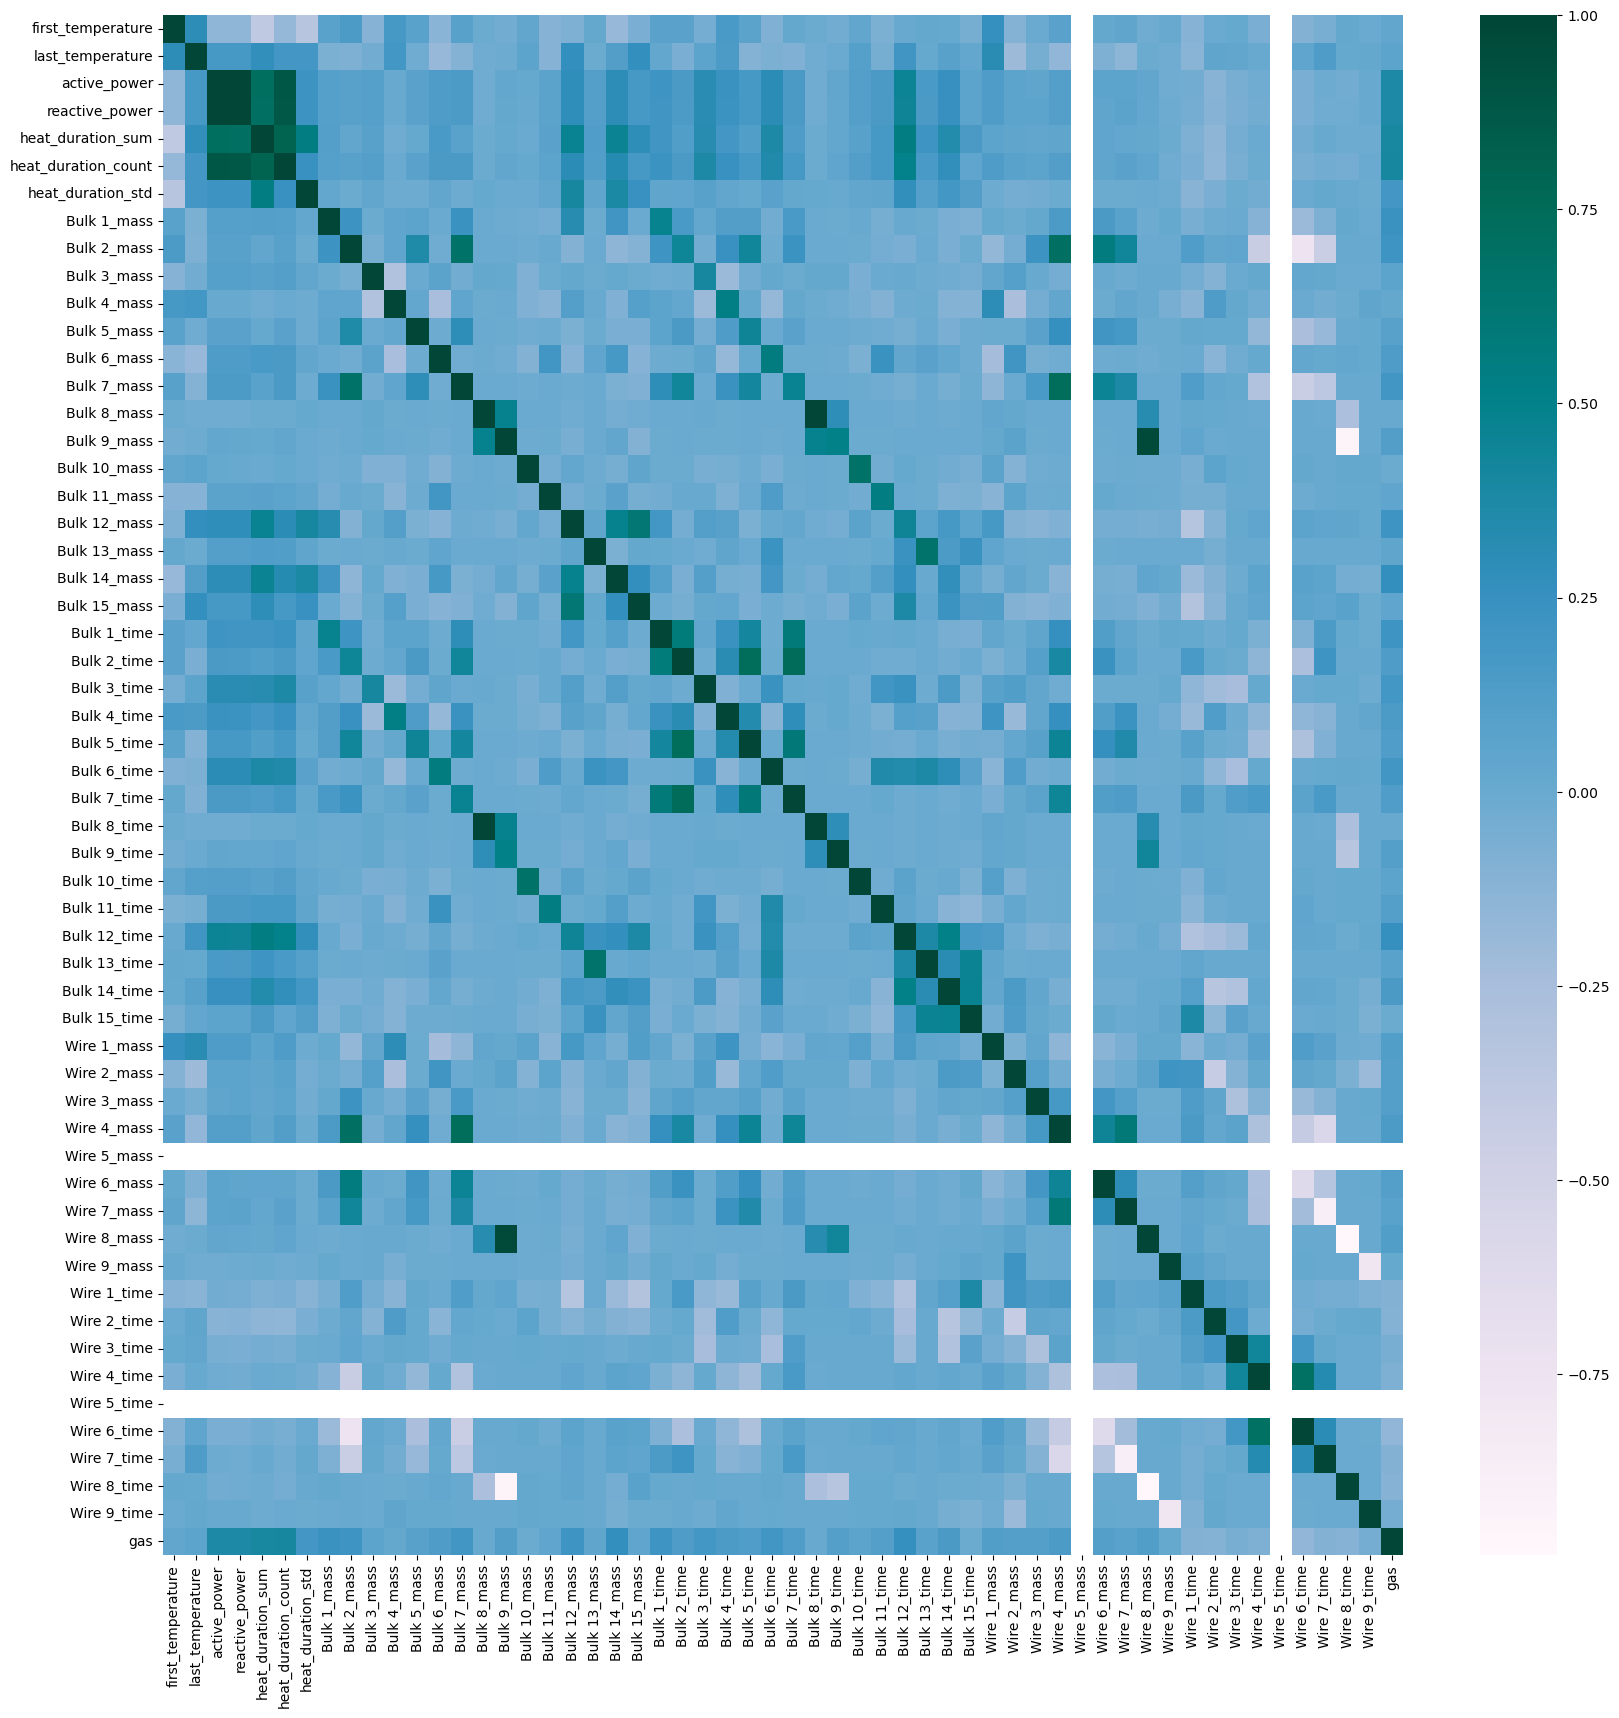

In [30]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(df_model.corr(numeric_only=True), ax=ax, cmap='PuBuGn')
plt.show()

**По тепловой карте видно:**
- столбцы по присадке Wire5 можно удалить - там 0 значения
- столбцы с мощностью и длительностью нагрева сильно коррелируют друг с другом. Нужно привести мощность и время нагрева к суммарной подведенной энергии
- странная корреляция у 'bulk 8_mass' и 'bulk 8_time', а также у 'bulk 9_mass' и 'wire 8_mass'. Эти столбцы также лучше удалить

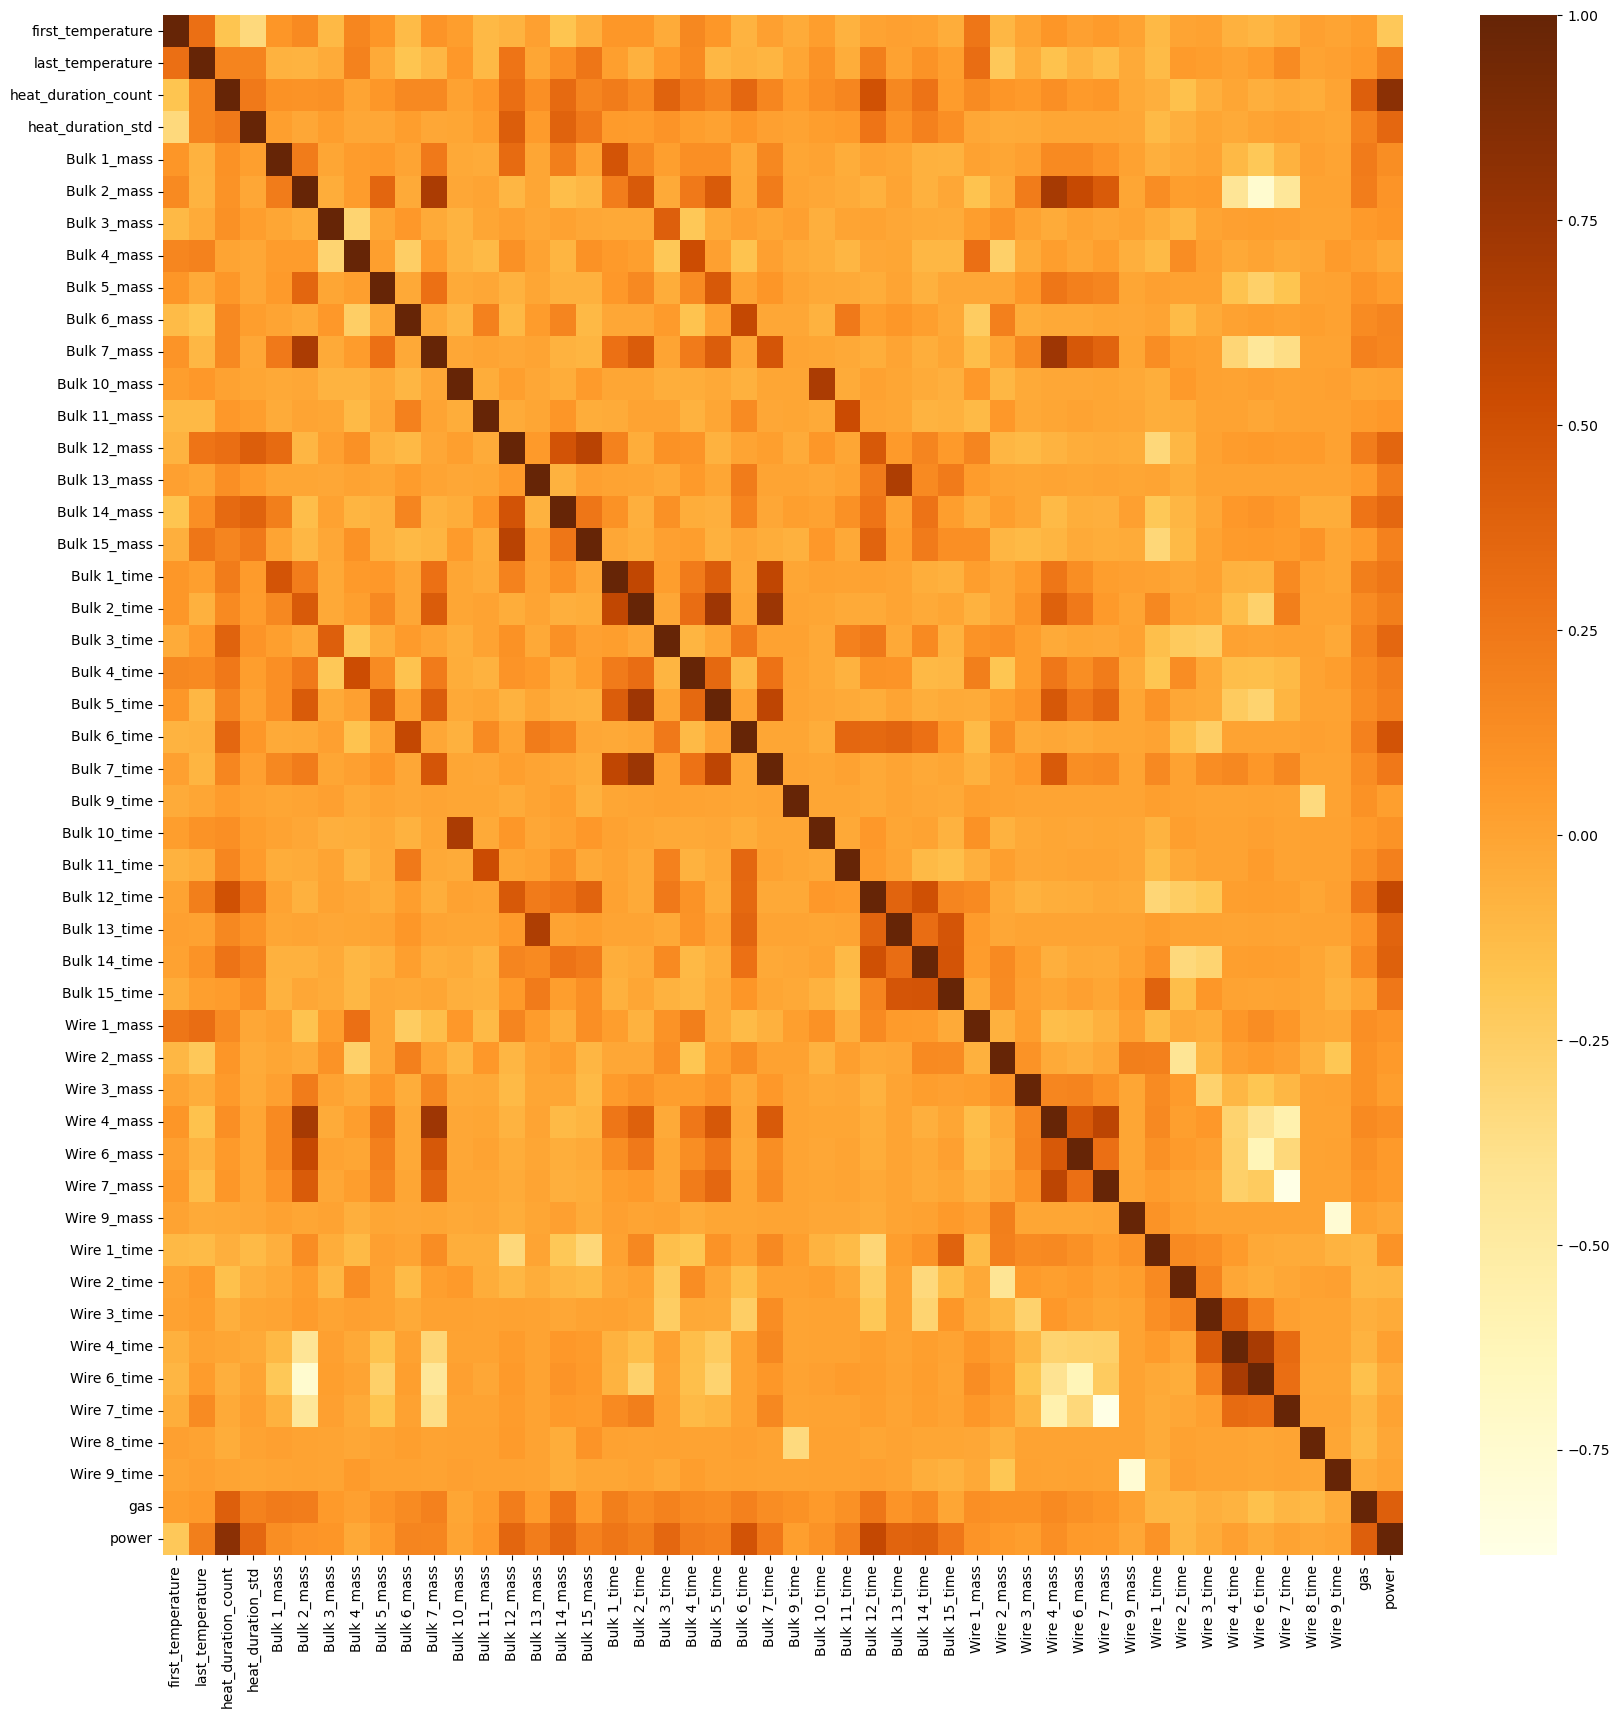

In [31]:
df_model['power'] = (df_model['active_power'] + df_model['reactive_power']) * df_model['heat_duration_sum']
df_model = df_model.drop\
(columns=['active_power', 'reactive_power', 'heat_duration_sum', 'Wire 5_mass', 'Wire 5_time', 'Bulk 9_mass', 'Bulk 8_mass',\
         'Bulk 8_time', 'Wire 8_mass'])
fig1, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(df_model.corr(numeric_only=True), ax=ax, cmap='YlOrBr')
plt.show()

## Разделение на выборки

In [32]:
df_train, df_test = train_test_split(df_model, test_size=.25, random_state=15823)

## Features & Targets

In [33]:
features_train = df_train.drop(columns=['last_temperature'], axis=1)
target_train = df_train['last_temperature']
features_test = df_test.drop(columns=['last_temperature'], axis=1)
target_test = df_test['last_temperature']

#features_test[:20].to_csv('try_features.csv')

In [34]:
#pd.read_csv('try_features.csv', index_col=[0])

## Масштабирование признаков

In [35]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

<font color='purpel' size=3><b>Комментарий тимлида </b></font>\
<font color='green' size=3> ✔️Ответы:
- Как мы обсудили на встрече, временные ряды не применяем
- этот вопросы мы разобарли на встрече, если не он осталься, то дай знать
- в качестве таргета берем последнюю температуру</font>

<font color='purpel' size=3><b>Комментарий тимлида </b></font>\
<font color='green' size=3> ✔️Хороший анализ, спасибо, приступай к следующей части, раздел 2.2.1 удали. </font>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента p1:</b>

Удалил
</div>

## Выбор и обучение моделей

### CatBoost

In [36]:
model = CatBoostRegressor(verbose=False, loss_function='MAE')#, ignored_features=[0])
grid = {'learning_rate': [0.1, 0.2, 0.5],
        'depth': range (1,4),
        'n_estimators': range (50,200,50),
        'rsm': [.5, 1]
       }
grid_search_result = model.grid_search(grid, X=features_train, y=target_train, cv=10, plot=True, verbose=False) 
best_cat = CatBoostRegressor(**grid_search_result['params'], random_state=15823, verbose=False)
joblib.dump(best_cat, 'best_cat.joblib')
print(grid_search_result['params'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 10.68052691
bestIteration = 49


bestTest = 7.1210912
bestIteration = 49


bestTest = 6.841219376
bestIteration = 49


bestTest = 7.14096421
bestIteration = 99


bestTest = 6.95358992
bestIteration = 88


bestTest = 6.789567783
bestIteration = 82


bestTest = 6.94779474
bestIteration = 149


bestTest = 6.88419575
bestIteration = 148


bestTest = 6.761966879
bestIteration = 135


bestTest = 10.93765682
bestIteration = 49


bestTest = 7.568332771
bestIteration = 49


bestTest = 7.551690828
bestIteration = 42


bestTest = 7.23247564
bestIteration = 95


bestTest = 7.415321363
bestIteration = 99


bestTest = 7.511823488
bestIteration = 65


bestTest = 7.119236326
bestIteration = 149


bestTest = 7.389911789
bestIteration = 127


bestTest = 7.511823488
bestIteration = 65


bestTest = 11.08734835
bestIteration = 49


bestTest = 7.52759679
bestIteration = 49


bestTest = 7.826637453
bestIteration = 21


bestTest = 7.448150277
bestIteration = 99


bestTest = 7.382991697
bestIterati

In [37]:
print('MAE CROSS VALIDATION')
min(grid_search_result['cv_results']['test-MAE-mean'])

MAE CROSS VALIDATION


6.667406568872669

In [38]:
#model = joblib.load('best_cat.joblib')
#start = time.time()
#model.fit(features_train, target_train)
#stop = time.time()
#print(f'fit time ---{stop - start}s' )
#start = time.time()
#predictions = model.predict(features_train)
#stop = time.time()
#print(f'predict time ---{stop - start}s' )
#print('MAE---', mean_absolute_error(predictions, target_train))

<font color='purpel' size=3><b>Комментарий тимлида p.2</b></font>

<font color='darkorange'>⚠️ Нас интересует метрика на кросс-валидации</font>



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента p2:</b>

Исправлено

</div>

### Линейная регрессия

In [39]:
result = cross_val_score(LinearRegression(), features_train, target_train, \
                         scoring='neg_mean_absolute_error', cv=10).mean()
print('MAE CROSS VALIDATION ---', abs(result))

MAE CROSS VALIDATION --- 6.943728665684931


In [40]:
#model = LinearRegression()
#start = time.time()
#model.fit(features_train, target_train)
#stop = time.time()
#print(f'fit time ---{stop - start}s' )
#start = time.time()
#predictions = model.predict(features_train)
#stop = time.time()
#print(f'predict time ---{stop - start}s' )
#print('MAE---', mean_absolute_error(predictions, target_train))

### LightGBM

In [41]:
lgb_features_train = df_train.drop(columns=['last_temperature'], axis=1)

train_data = lgb.Dataset(lgb_features_train, label=target_train, \
                         feature_name=lgb_features_train.columns.to_list(), free_raw_data=False)

gkf = KFold(n_splits=10, shuffle=True, random_state=15823).split(X=lgb_features_train, y=target_train)

param_grid = {
    'num_leaves': [2, 5, 10],
    'learning_rate': [.001, .05, .1],
    'n_estimators':[100, 150]
    }

lgb_estimator = lgb.LGBMRegressor(objective='regression', force_col_wise=True, \
                                  metric='mae', verbose=-1)

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf, scoring='neg_mean_absolute_error')
lgb_model = gsearch.fit(X=lgb_features_train, y=target_train)

print(lgb_model.best_params_)
best_params = lgb_model.best_params_
best_model = lgb.LGBMRegressor(objective='regression', force_col_wise=True, metric='mae', verbose=0, **lgb_model.best_params_)
best_model.fit(lgb_features_train, target_train)
best_model.booster_.save_model('best_lgb.txt')

print('BEST MAE CROSS VALIDATION ---', abs(lgb_model.best_score_))

{'learning_rate': 0.05, 'n_estimators': 150, 'num_leaves': 10}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
BEST MAE CROSS VALIDATION --- 6.405407547808183


<font color='purpel' size=3><b>Комментарий тимлида p.2</b></font>

<font color='darkorange'>⚠️ Лучше взять алгоритм автоматическоо поиска, чтоб не использовать циклы для подбора параметров.</font>



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента p2:</b>

Исправлено

</div>

## Проверка лучших моделей (CatBoost и LightGBM) на тестовой выборке

In [42]:
model = joblib.load('best_cat.joblib')
start = time.time()
model.fit(features_train, target_train)
stop = time.time()
print(f'fit time ---{stop - start}s' )
start = time.time()
predictions = model.predict(features_test)
stop = time.time()
print(f'predict time ---{stop - start}s' )
print('MAE---', mean_absolute_error(predictions, target_test))

fit time ---0.5357499122619629s
predict time ---0.00999760627746582s
MAE--- 6.824957942335237


In [43]:
lgb_features_test = df_test.drop(columns=['last_temperature'], axis=1)
model = lgb.Booster(model_file='best_lgb.txt')
start = time.time()
predictions = model.predict(lgb_features_test)
stop = time.time()
print(f'predict time ---{stop - start}s' )
print('MAE---', mean_absolute_error(predictions, target_test))

predict time ---0.02209925651550293s
MAE--- 6.500527971084736


## Проверка на адекватность (сравнение с предсказанием средней величины)

In [44]:
dummy_model = DummyRegressor()
dummy_model.fit(features_train, target_train)
predictions = dummy_model.predict(features_test)
print('MAE---', mean_absolute_error(predictions, target_test))

MAE--- 8.068516998902917


### Feature importances

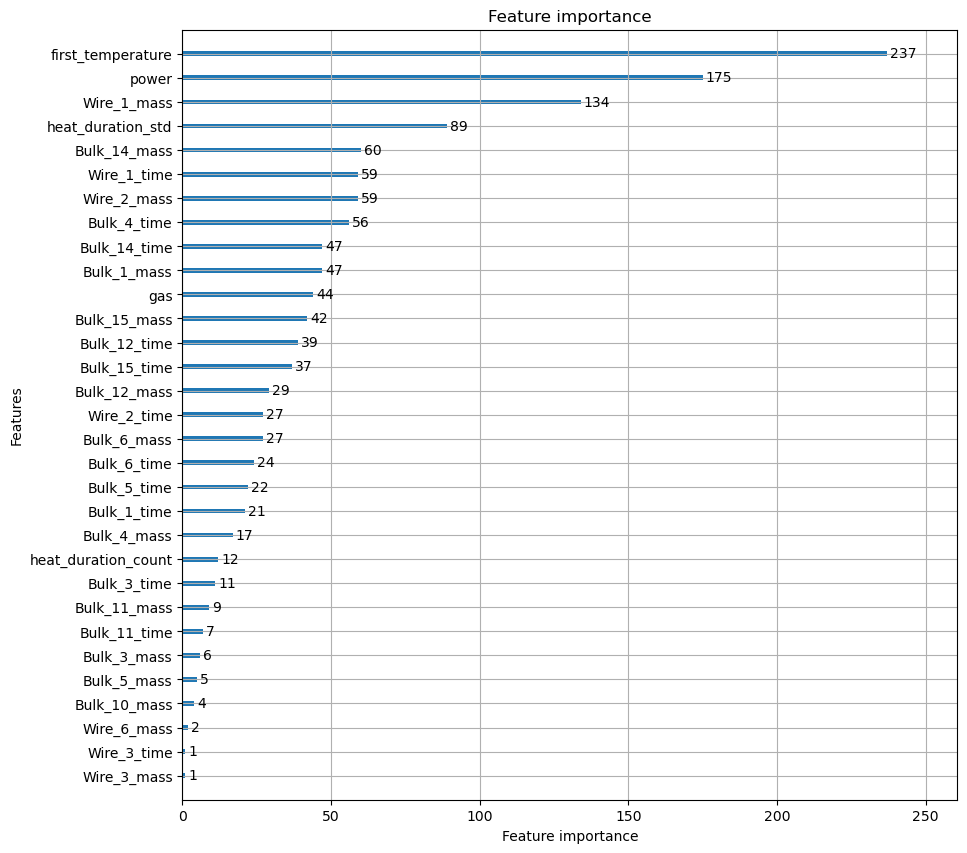

In [46]:
lgb.plot_importance(model, figsize=(10,10))
plt.show()

## Вывод

**Модели на тестовой выборке показали следующие результаты**
|Модель|MAE|
| ---| ---|
|CatBoost|6,82|
|LightGBM|**6,50**|
|Dummy Regressor (mean) |8,06|

Наименьшее значение целевой метрики MAE обеспечивает модель LightGBM, при этом МАЕ не превышает требуемого значения - 6,8.
Также модель обеспечивает лучшее значение метрики по сравнению с константной моделью.

Наиболее важные для модели признаки выглядят логично:
- энергия затраченная на нагрев
- начальная температура
- по поводу Wire1 можно предположить, что это легирующая присадка с температурой плавления, заметно отличающейся от температуры плавления железа, что и приводит к ее влиянию на конечную температуру

<font color='purpel' size=3><b>Комментарий тимлида p.2</b></font>

<font color='green' size =3> ✔️ Федор, хорошая работа, спасибо, обрати внимание на следующие моменты:

- много циклов, которые можно заменить групповые таблицы, также таблицу с температурами можно перобразовать с помощью групповой или сводной таблицы.
- код должен воспроизводиться на платформе яндекс тоже
- мы выбираем модель по метрике на кросс-валидации(catboost оцениваем по трейну сейчас) https://habr.com/ru/articles/599827/
- в lgbm циклы также можем заменить на gridsearchcv

Если будут вопросы, рад буду ответить!</font>



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента p2:</b>

Вопросы есть. Расскажи, пожалуйста, что я упустил при подготовке признаков для обучения. В какую сторону еще можно посмотреть, чтобы улучшить метрику

</div>

# Отчет

## Цель работы

В работе решается задача прогнозирования температуры сплава стали в конце технологического процесса выплавки стали. Актуальность задачи обусловлена тем, что в ходе выплавки периодически происходит нагрев расплава с последующим контролем химического состава, поэтому более раннее достижение целевой температуры снизит расход электроэнергии на металлургическом предприятии

## Показатели

В качестве целевой метрики в задаче используется MAE - Mean Absolute Error - среднее значение абсолютного отклонения величины. По условиям задачи и исходя из здравого смысла модель должна обеспечивать **MAE < 6,8°C**

## Исходные данные

Исходные данные, использовавшиеся при обучении, состояли из нескольких таблиц:
|Наименование таблицы|Описание|
|----|----|
| 'data_arc_new.csv'|Данные по включению нагревателей (время и мощность)|
|'data_bulk_new.csv'|Количественные данные по подаче сыпучих легирующих материалов|
| 'data_bulk_time_new.csv'|Временные метки по подаче сыпучих легирующих материалов|
|'data_gas_new.csv'|Данные по подаче газа продувки расплава|
|'data_temp_new.csv'|Результаты измерений температуры|
|'data_wire_new.csv'|Количественные данные по подаче легирующих материалов в виде проволоки|
|'data_wire_time_new.csv'| Временные метки по подаче легирующих материалов в виде проволоки|

Особенностью исходных данных явилось то, что часть таблиц содержали агрегированные по номеру образца (плавки) данные, а часть - данные для каждого образца по каждой временной метке. 

**В исходных данных содржалась информация максимум по 3214 уникальным образцам**

В ходе предварительного анализа данных было установлено:
- пропуски в данных есть только в таблицах по легирующим элементам и обусловлены тем, что какие-то элементы просто не добавляются.
- есть неадекватные значенияЖ отрицательная мощность и температура ниже 1500°C (технологически невозможно в данном случае)
- в разных таблицах разное количество уникальных номеров образцов


## Предобработка данных

Для подготовки данных к обучению моделей были выполнены следующие шаги:
- удалены образцы с аномальными значениями мощности и температуры
- удалены образцы, для которых количество измерений темературы не превышает 1 (поскольку конечная температура является предсказываемым значением)
- заполнены пропуски по легирующим элементам (значение 0)
- выполнена аггрегация таблицы с измерениями температуры по уникальному номеру образца: сформированы новые столбцы - начальная и конечная температура
- выполнена аггрегация таблицы с данными о нагревателях по уникальному номеру образца: сформированы новые столбцы - суммарные мощности, продолжительность нагрева, количество включений нагревателя, стандартное отклонение времени работы нагревателя
- объединение всех таблиц (тип inner) по уникальному номеру образца. Таким образом в финальный набор данных вошли только те образцы, по которым есть информация во всех таблицах
- в объединенной таблице абсолютное время добавления легирующего элемента было заменено на время от момента первого включения нагревателя
- были удалены неинформативные для машинного обучения столбцы - время первого включения нагреватея и номер образца
- выпонен анализ корреляции признаков. Сильно скоррелированные признаки были удалены, либо заменены на альтернатиные (мощность и время работы нагревателя заменены на затраченную энергию), также были удалены данные по легирующему элементу, который к рассматриваемым образцам не добавлялся (Wire 5)
- данные были поделены на выборки (тренировочную и тестовую), тестовая выборка составила 25% от всего набора данных
- были выделены целевое значение (конечная температура) и признаки
- признаки были отмасштабированы

**После предобработки осталось 2324 образца**

## Выбор модели машинного обучения

**В исследовательской части проекта были рассмотрены и использованием кросс-валидации (число блоков 10) модели**

- CatBoostRegressor
- LinearRegression
- LightGBMRegressor

**Наилучшие результаты по целевой метрике показала на кросс-валидации модель LightGBMRegressor со следующими гиперпараметрами**

|Параметр|Значение|
|---|---|
|learning_rate|0,05|
|n_estimators|150|
|num_leaves|10|

**При проверке на тестовой выборке и при сравнении рассмотренных моделей с константной моделью получены следующие результаты**

|Модель|MAE|
| ---| ---|
|CatBoost|6,82|
|LightGBM|**6,50**|
|Dummy Regressor (mean) |8,06|

**Наименьшее значение целевой метрики MAE обеспечивает модель LightGBM, при этом МАЕ не превышает требуемого значения - 6,8.
Также модель обеспечивает лучшее значение метрики по сравнению с константной моделью.**

**Топ-3 признаков по важности для предсказания**

- энергия, затраченная на нагрев
- начальная температура
- количество элемента Wire1 (вероятно, имеет температуру плавления, заметно отличающуюся от температуры плавления железа, что и приводит к его влиянию на конечную температуру)

## Деплой

Лучшая из выбранных моделей помещена в Docker-контейнер
Фронтенд реализован с использованием Streamlit

Модель функционирует следующим образом.
- на вход подаются подготовленные признаки (например, первые 10 строк из features_test) в формате csv. Признаков должно быть 47 (аналогично предобработке в данном исследовании)
- предсказания модели выводятся пользователю в виде таблицы

Исходные файлы для локальной работы с моделью образа находятся на [GitHub](https://github.com/fedor-konovalenko/yandex-practicum/tree/main/%D0%B2%D1%8B%D0%BF%D1%83%D1%81%D0%BA%D0%BD%D0%BE%D0%B9%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82)

Структура репозитория
- app - папка с приложением и докер-файлом
- example.csv - пример файла признаков для проверки модели

**Клонирование репозитория**
```bash
git clone
```

**Сборка**
```bash
docker build --t metal .
```
**Запуск**
```bash
docker run --rm -it -p 8501:8501 --name LGBMContainer metal
```

После этого модель доступна по адресу 
```bash
localhost:8501/
```

## Вывод

**Разработана, протестирована и развернута модель, обеспечивающая предсказание конечной температуры сплавов стали со значением МАЕ не более 6,5**